<a href="https://colab.research.google.com/github/HwangHanJae/ml-definitive-guide-pratice/blob/main/regression/regression_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#회귀 트리
<h3>회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 하는 것</h3>
- 분류 트리와는 달리 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산함

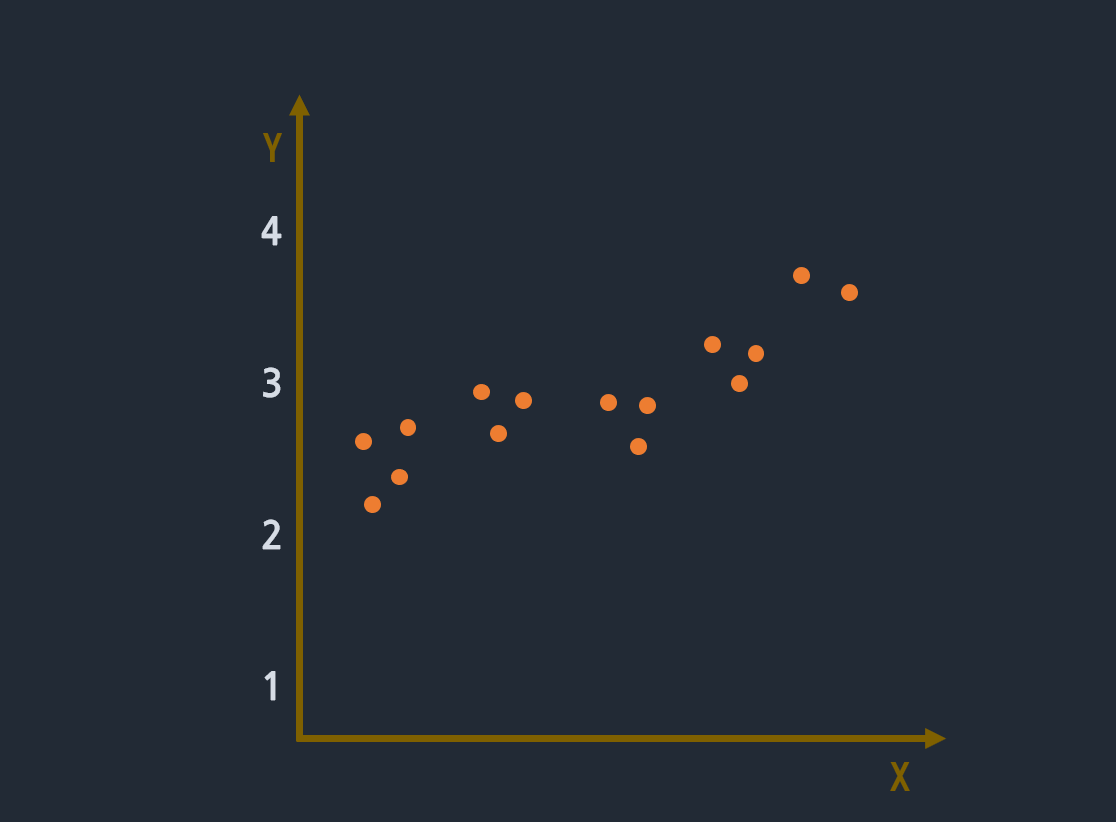

피처가 단 하나인 X 피처 데이터 세트와 결정값 Y가 2차원 평명상에 위의 그림과 같이 있다고 가정  

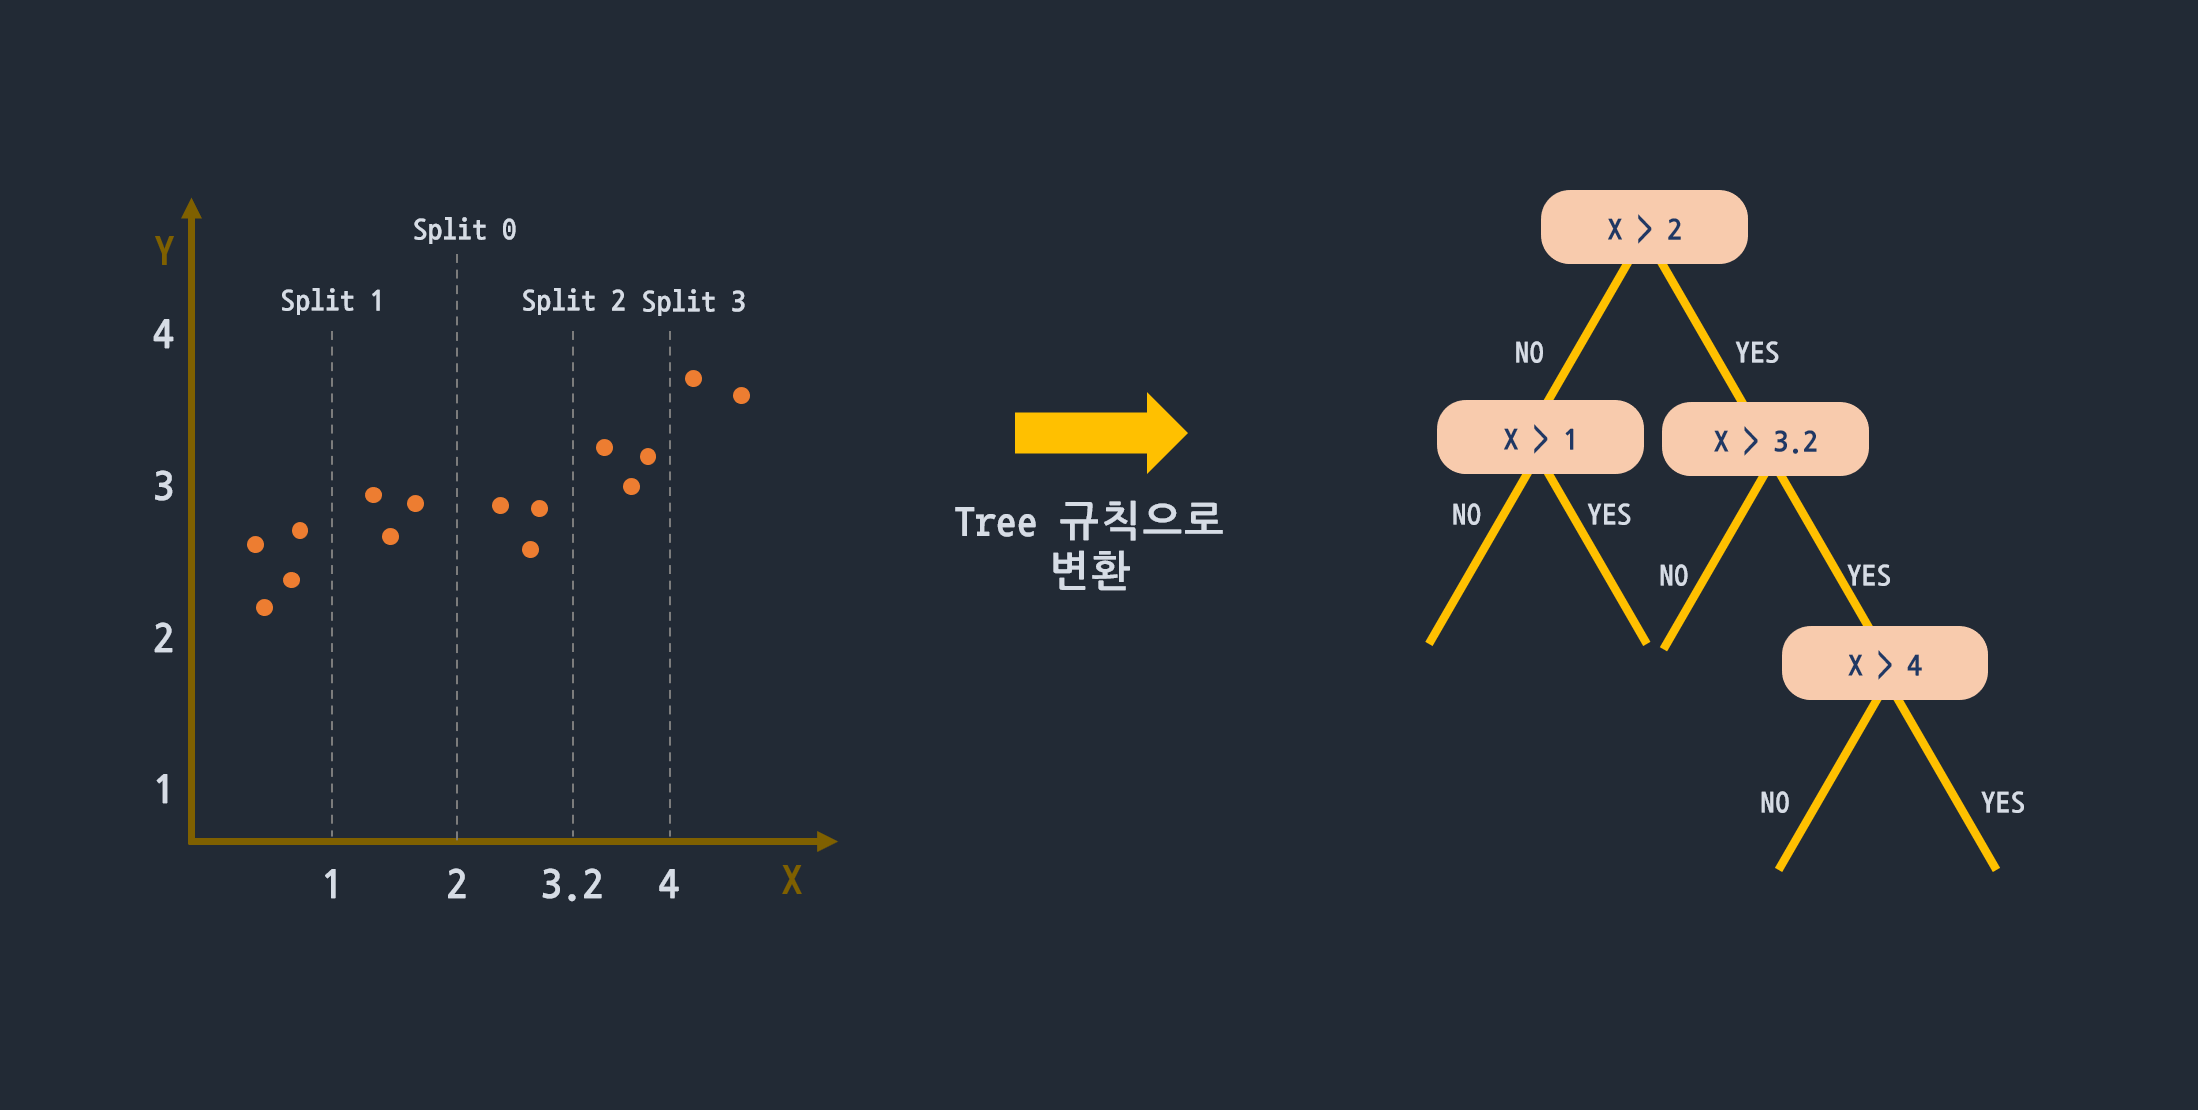

1. 데이터 세트의 X 피처를 결정 트리 기반으로 분할
  - X값의 균일도를 반영한 지니 계수에 따라 왼쪽 그림과 같이 분할 할 수 있음
2. 루트 노드를 Split 0 기준으로 분할하고 이렇게 분할된 규칙 노드에서 다시 Split 1, 2로 규칙 노드로 분할 할 수 있음
3. Split 2는 다시 재귀적으로 Split 3 규칙 노드로 변환

오른쪽과 같은 트리 규칙으로 변환

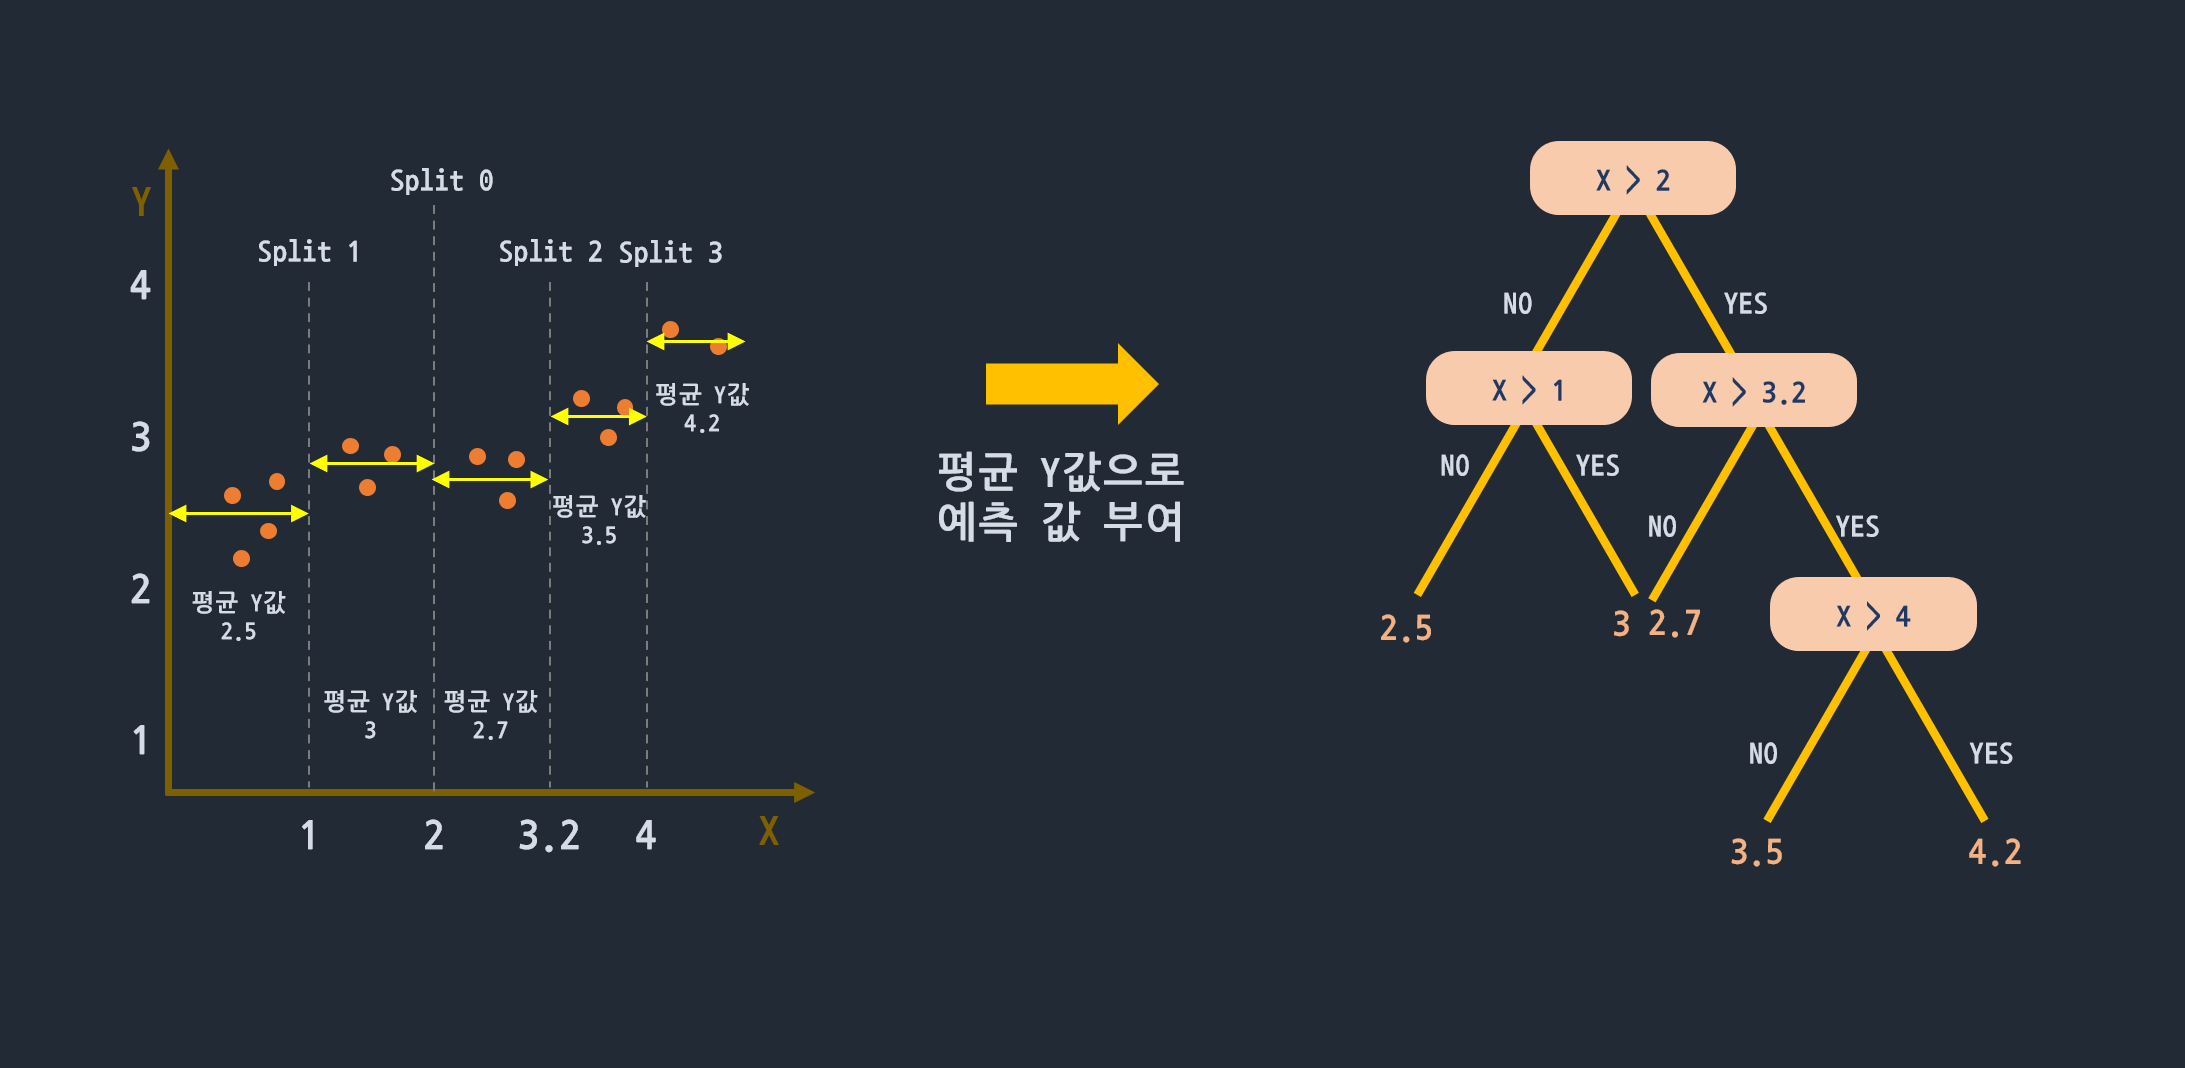

리프 노드 생성 기준에 부합하는 트리 분할이 완료되었다면  
리프 노드에 소속된 데이터 값의 평균값을 구해서 최종적으로 리프 노드에 결정값으로 할당   


## 코드구현
- 보스턴 주택가격 예측

In [2]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

#보스턴 데이터 세트 로드
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)

df['PRICE'] = boston.target
X = df.drop('PRICE', axis=1)
y = df['PRICE']

rf = RandomForestRegressor(random_state=0, n_estimators= 1000)
neg_mse_scores = cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores : ', np.round(neg_mse_scores,2))
print("5 교차 검증의 개별 RMSE scores : ", np.round(rmse_scores,2))
print("5 교차 검증의 평균 RMSE : {:.3f}".format(avg_rmse))

5 교차 검증의 개별 Negative MSE scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.423


In [3]:
# 모델을 입력받아 교차검증으로 평균 RMSE를 계산해주는 함수
def get_model_cv_prediction(model, X,y):
  neg_mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
  rmse_scores = np.sqrt(-1*neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print("#### {} ####".format(model.__class__.__name__))
  print("5 교차 검증의 평균 RMSE : {:.3f}".format(avg_rmse))

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt = DecisionTreeRegressor(random_state=0, max_depth=4)
rf = RandomForestRegressor(random_state=0, n_estimators= 1000)
gb = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb = XGBRegressor(n_estimators=1000)
lgb = LGBMRegressor(n_estimators=1000)

models = [dt, rf, gb, xgb, lgb]
for model in models:
  get_model_cv_prediction(model, X, y)

#### DecisionTreeRegressor ####
5 교차 검증의 평균 RMSE : 5.978
#### RandomForestRegressor ####
5 교차 검증의 평균 RMSE : 4.423
#### GradientBoostingRegressor ####
5 교차 검증의 평균 RMSE : 4.269
[14:41:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:41:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:41:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:41:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#### XGBRegressor ####
5 교차 검증의 평균 RMSE : 4.089
#### LGBMRegressor ####
5 교차 검증의 평균 RMSE : 4.646


회귀 트리는 선형 회귀와 다른 처리 방식이므로 coef_ 속성이 없음

피처의 중요도 표현

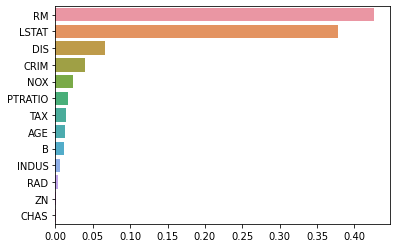

In [6]:
import seaborn as sns

rf.fit(X,y)
feature_series = pd.Series(data=rf.feature_importances_, index=X.columns)
feature_seires = feature_series.sort_values(ascending=False)
sns.barplot(x = feature_seires, y = feature_seires.index)

회귀트리가 어떻게 예측하는지 선형회귀와 비교해서 시각화
- max_depth의 크기를 변화시키면서 어떻게 회귀 트리 예측선이 변화하는지 확인
- RM 칼럼만 이용

(506, 14)


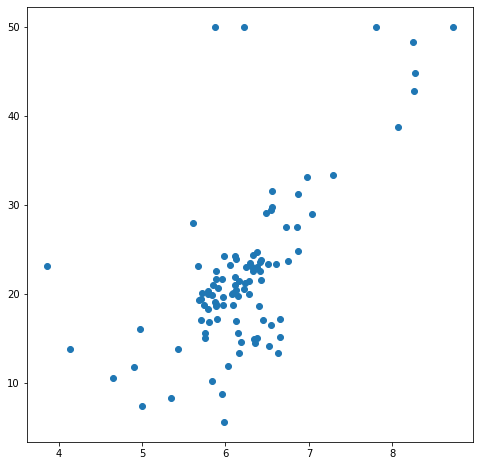

In [7]:
#100개의 데이터만 샘플링
import matplotlib.pyplot as plt
df_sample = df[["RM","PRICE"]]
df_sample = df_sample.sample(n=100, random_state=0)
print(df.shape)
plt.figure(figsize=(8,8))
plt.scatter(df_sample['RM'], df_sample["PRICE"])

In [13]:
#LinearRegression, DecisionTreeRegressor를 max_depth를 각각 2, 7로 해서 학습
#학습된 모델에 RM값을 4.5~8.5까지의 100개의 테스트 데이터 세트로 제공했을 때 예측값 구함

import numpy as np
from sklearn.linear_model import LinearRegression

#선형 회귀와 결정트리 기반의 Regressor 생성
lr = LinearRegression()
dt1 = DecisionTreeRegressor(max_depth = 2)
dt2 = DecisionTreeRegressor(max_depth = 7)

#실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성.
test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

#보스턴 주택 가격 데이터에서 시각화를 위해 피처만 RM, PRICE aks ccnf
feature = df_sample["RM"].values.reshape(-1,1)
target = df_sample['PRICE'].values.reshape(-1,1)

#학습과 예측 수행
lr.fit(feature, target)
dt1.fit(feature, target)
dt2.fit(feature, target)

pred_lr = lr.predict(test)
pred_dt1 = dt1.predict(test)
pred_dt2 = dt2.predict(test)

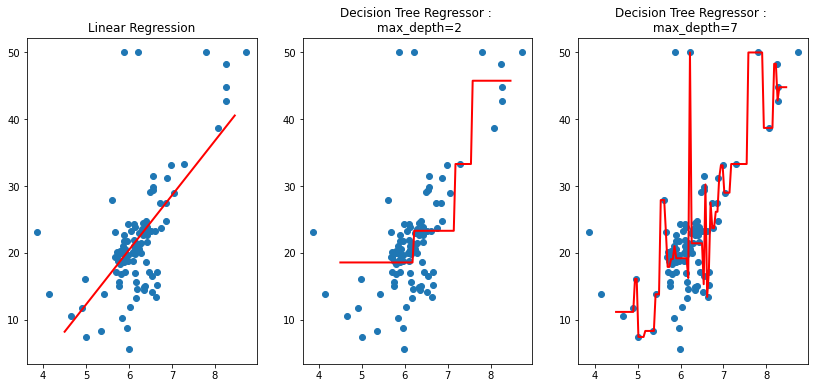

In [16]:
#회귀선 그리기
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,6))

# X축 값을 4.5~8.5로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화

# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title("Linear Regression")
ax1.scatter(df_sample["RM"], df_sample["PRICE"])
ax1.plot(test, pred_lr, label='linear', linewidth=2, color='red')

#dt1 , max_depth = 2 회귀선
ax2.set_title("Decision Tree Regressor : \n max_depth=2")
ax2.scatter(df_sample["RM"], df_sample["PRICE"])
ax2.plot(test, pred_dt1, label='max_depth:3', linewidth=2,color='red')

#dt2 , max_depth = 7 회귀선
ax3.set_title("Decision Tree Regressor : \n max_depth=7")
ax3.scatter(df_sample["RM"], df_sample["PRICE"])
ax3.plot(test, pred_dt2, label='max_depth:7', linewidth=2,color='red')

plt.show()

선형회귀는 역시 직선으로 예측 회귀선을 표현함  
회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태의 회귀선을 만듬  
max_depth=7인 경우에는 학습 데이터의 이상치 데이터도 학습하면서 복잡한 계단형태를 만드는데 과적합이 되기 쉬운 모델임  